## <span style='color:Orange'><center>Covid - 19 Analysis<center></span>
***
<center>Lithuania and the World<center>

In [1]:
import pandas as pd
Covid_data_with_testing = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",
                                      parse_dates = ["date"], index_col =["location","date"])

#display(Covid_data_with_testing.tail(3))


In [2]:
Covid_data_with_testing_adj=Covid_data_with_testing.drop(columns = ['weekly_icu_admissions','weekly_icu_admissions_per_million',
                                    'weekly_hosp_admissions','weekly_hosp_admissions_per_million',
                                    'icu_patients', 'icu_patients_per_million', 'hosp_patients','hosp_patients_per_million',
                                    'new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million'])


In [3]:
Covid_data_with_testing_LT = Covid_data_with_testing_adj[Covid_data_with_testing_adj["iso_code"]=='LTU']
Covid_data_with_testing_LT = Covid_data_with_testing_LT.dropna(axis = "columns", how = "all")
#display(Covid_data_with_testing_LT.tail(3))

In [4]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',
                        parse_dates = ["Date"], index_col =["Country","Date"])

covidLT = covid_data.loc["Lithuania"]

covidLT.loc[:,("Currently infected")] = covidLT.loc[:,"Confirmed"]-covidLT.loc[:,"Recovered"]-covidLT.loc[:,"Deaths"]
covidLT.loc[:,("Completed cases")] = covidLT.loc[:,"Recovered"]+covidLT.loc[:,"Deaths"]

#noticed that data in first dataset has one day lag. It means that numbers for 2020-11-01 was actualy for 2020-10-30
from pandas.tseries.offsets import DateOffset
Covid_data_with_testing_LT1=Covid_data_with_testing_LT.reset_index(level='location')
Covid_data_with_testing_LT1.index = Covid_data_with_testing_LT1.index + pd.DateOffset(days=-1)
Covid_data_with_testing_LT1 = Covid_data_with_testing_LT1.set_index('location', append=True)

MergedDataSet = pd.merge(Covid_data_with_testing_LT1.reset_index(),
      covidLT.reset_index(),
      left_on = "date", right_on = "Date", how = "left"
     ).set_index(['date','location'])

display(MergedDataSet.tail(3))


,,iso_code,continent,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Date,Confirmed,Recovered,Deaths,Currently infected,Completed cases
date,location,,,,,,,,,,,,,,,,,,,,,
2020-11-10,Lithuania,LTU,Europe,26841.0,1086.0,221.0,11.0,9859.710,398.929,81.182,4.041,...,38.0,6.56,75.93,0.858,2020-11-10,26841.0,5962.0,221.0,20658.0,6183.0
2020-11-11,Lithuania,LTU,Europe,28262.0,1421.0,235.0,14.0,10381.697,521.987,86.324,5.143,...,38.0,6.56,75.93,0.858,2020-11-11,28262.0,6608.0,235.0,21419.0,6843.0
2020-11-12,Lithuania,LTU,Europe,29812.0,1550.0,244.0,9.0,10951.070,569.373,89.630,3.306,...,38.0,6.56,75.93,0.858,2020-11-12,29812.0,7096.0,244.0,22472.0,7340.0


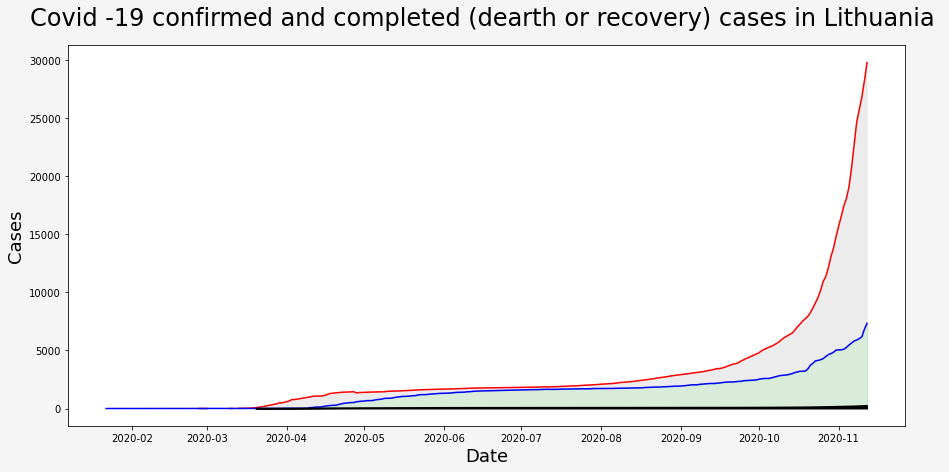

In [5]:
import matplotlib.pyplot as plt
import numpy as np

MergedDataSet["Currently infected"] =MergedDataSet.loc[:,"total_cases"]-MergedDataSet.loc[:,"Recovered"]-MergedDataSet.loc[:,"total_deaths"]
MergedDataSet["Completed cases"] = MergedDataSet.loc[:,"Recovered"]+MergedDataSet.loc[:,"Deaths"]
data_new = MergedDataSet.reset_index()

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

ax.plot(data_new['date'], data_new["total_cases"] , color = "red", label='Total cases')
ax.plot(data_new['date'], data_new["Completed cases"], color = "blue")
ax.plot(data_new['date'], data_new["total_deaths"], color = "Black", label='Total deaths')

ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Cases',fontsize=18)
ax.set_title("Covid -19 confirmed and completed (dearth or recovery) cases in Lithuania " , fontsize=24, pad=20)

X = np.array(data_new['date'])

Y1 = np.array(data_new["total_cases"])
Y2 = np.array(data_new["Completed cases"])
Y3 = np.array(data_new["total_deaths"])
ax.fill_between(X, Y1,Y2,color='grey',alpha=.15)
ax.fill_between(X, Y2,Y3,color='green',alpha=.15)
ax.fill_between(X, Y3,0,color='black')

plt.show()

,new_cases_per_million,new_tests_per_thousand
location,,
Lithuania,10951.068,288.287


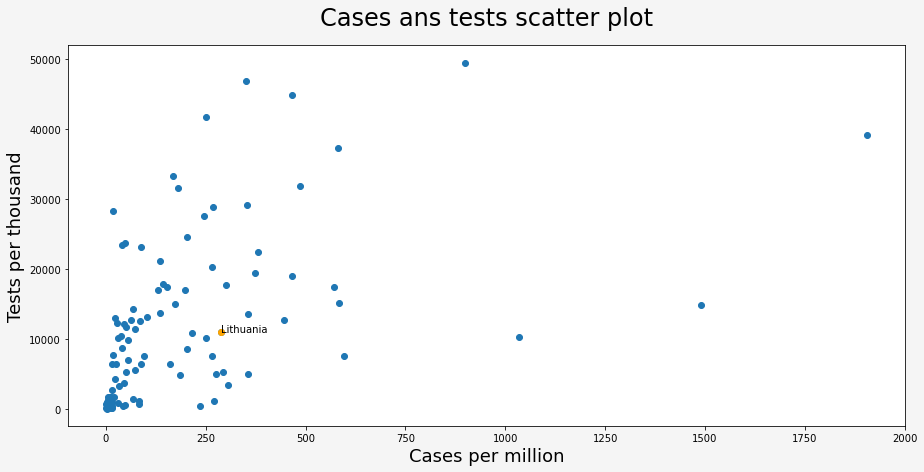

In [6]:
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

new_data_total = Covid_data_with_testing_adj.reset_index()
countries = new_data_total.groupby("location")[["new_cases_per_million", "new_tests_per_thousand"]].sum()
countries = countries[countries["new_tests_per_thousand"]>0]
countriesLT = countries.filter(like='Lithuania', axis=0)
display(countriesLT)

ax.scatter(countries["new_tests_per_thousand"], countries["new_cases_per_million"])
ax.scatter(countriesLT["new_tests_per_thousand"], countriesLT["new_cases_per_million"], color = "orange" )

ax.set_xlabel("Cases per million", fontsize = 18)
ax.set_ylabel("Tests per thousand", fontsize = 18)
ax.set_title("Cases ans tests scatter plot" , fontsize=24, pad=20)

ax.annotate("Lithuania", xy=(countriesLT["new_tests_per_thousand"][0],countriesLT["new_cases_per_million"][0]))

plt.show()

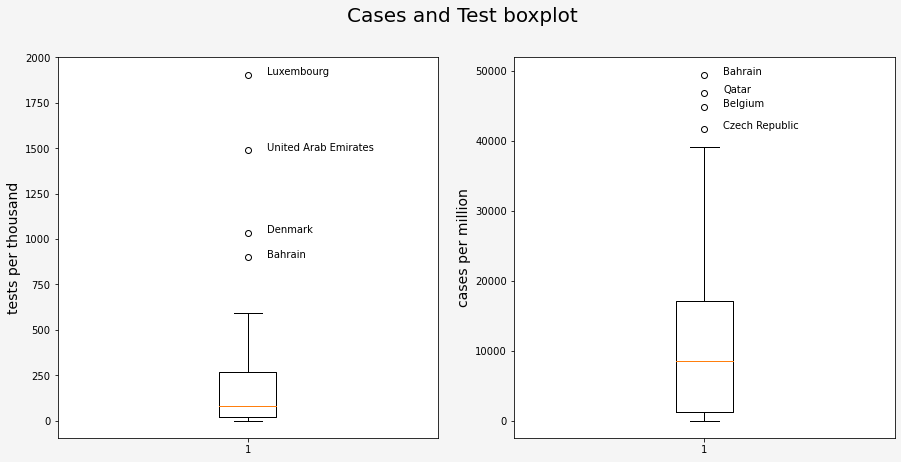

In [7]:
Q1_tests = countries['new_tests_per_thousand'].quantile(0.25)
Q3_tests = countries['new_tests_per_thousand'].quantile(0.75)
IQR_tests = Q3_tests - Q1_tests
#print(IQR_tests)
Check_outliers_tests = (countries['new_tests_per_thousand'] < (Q1_tests - 1.5 * IQR_tests)) |(countries['new_tests_per_thousand'] > (Q3_tests + 1.5 * IQR_tests))
counties_with_testing_outliar_tests = Check_outliers_tests.reset_index()[Check_outliers_tests.reset_index()["new_tests_per_thousand"] == True] 
#display(countries[Check_outliers_tests])
Counties_without_outliers_tests = countries[~Check_outliers_tests]


Q1_cases = countries["new_cases_per_million"].quantile(0.25)
Q3_cases = countries["new_cases_per_million"].quantile(0.75)
IQR_cases = Q3_cases - Q1_cases
#print(IQR_cases)
Check_outliers_cases = (countries["new_cases_per_million"] < (Q1_cases - 1.5 * IQR_cases)) |(countries["new_cases_per_million"] > (Q3_cases + 1.5 * IQR_cases))
counties_with_testing_outliar_cases = Check_outliers_cases.reset_index()[Check_outliers_cases.reset_index()["new_cases_per_million"] == True] 
#display(countries[Check_outliers_cases])
Counties_without_outliers_cases = countries[~Check_outliers_cases]

fig, ax = plt.subplots(1,2, figsize=(15,7),facecolor = "#F5F5F5")

fig.suptitle('Cases and Test boxplot', fontsize = 20)

ax[0].boxplot(countries["new_tests_per_thousand"])
ax[1].boxplot(countries["new_cases_per_million"])

ax[0].set_ylabel("tests per thousand", fontsize = 14)
ax[1].set_ylabel("cases per million", fontsize = 14)

Outliars_names_tests = countries[Check_outliers_tests].index.tolist()
Outliars_tests = countries[Check_outliers_tests]["new_tests_per_thousand"].tolist()
Outliars_names_cases = countries[Check_outliers_cases].index.tolist()
Outliars_cases = countries[Check_outliers_cases]["new_cases_per_million"].tolist()

for i, txt in enumerate(Outliars_names_tests):
    ax[0].annotate(txt, xy= (1, Outliars_tests[i]), xytext= (1.05, Outliars_tests[i]))

for i, txt in enumerate(Outliars_names_cases):
    ax[1].annotate(txt, xy= (1, Outliars_cases[i]), xytext= (1.05, Outliars_cases[i]))
      
plt.show()

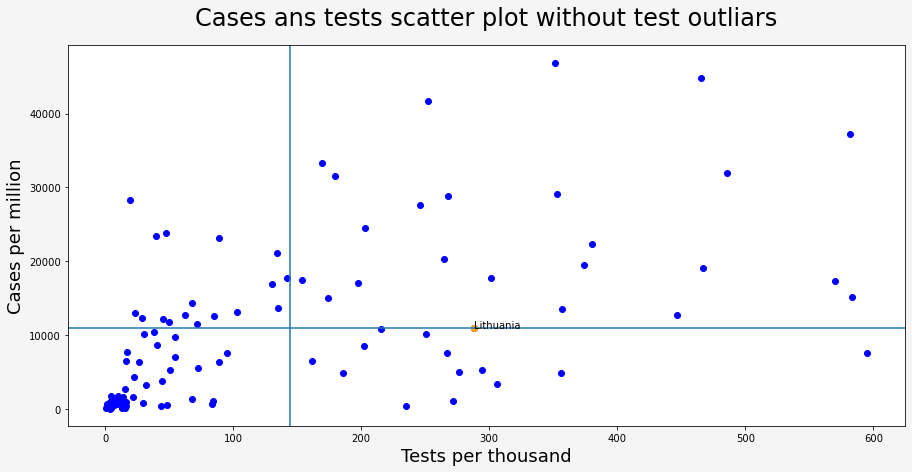

In [9]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

avg_tests=Counties_without_outliers_tests.iloc[:,1].mean()
avg_cases=Counties_without_outliers_tests.iloc[:,0].mean()

ax.scatter(Counties_without_outliers_tests["new_tests_per_thousand"], 
                               Counties_without_outliers_tests["new_cases_per_million"], 
                               color = "blue" )
ax.scatter(countriesLT["new_tests_per_thousand"], countriesLT["new_cases_per_million"], 
                 color = "orange" )

ax.set_xlabel("Tests per thousand", fontsize = 18)
ax.set_ylabel("Cases per million", fontsize = 18)
ax.set_title("Cases ans tests scatter plot without test outliars" , fontsize=24, pad=20)
ax.axvline(avg_tests, 0, 1, label='')
ax.axhline(avg_cases, 0, 1, label='')
ax.annotate("Lithuania", xy=(countriesLT["new_tests_per_thousand"][0],countriesLT["new_cases_per_million"][0]))
plt.show()